In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")

In [ ]:
file_path = "/content/Airbnb_Open_Data.csv"

df = pd.read_csv(file_path,sep=",",engine="python",on_bad_lines="skip",encoding="latin1")

In [63]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
df.head()

Shape: (5200, 26)

Columns: Index(['ï»¿id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license'], dtype='object')


,ï»¿id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.isnull().sum()

msno.matrix(df)
plt.show()

df.drop_duplicates(inplace=True)

In [ ]:
df['reviews per month'] = df['reviews per month'].fillna(0)
df = df.dropna(subset=['NAME','host name'])

In [64]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ï»¿id                           5200 non-null   int64  
 1   NAME                            5142 non-null   object 
 2   host id                         5200 non-null   int64  
 3   host_identity_verified          5127 non-null   object 
 4   host name                       5180 non-null   object 
 5   neighbourhood group             5173 non-null   object 
 6   neighbourhood                   5184 non-null   object 
 7   lat                             5192 non-null   float64
 8   long                            5192 non-null   float64
 9   country                         5150 non-null   object 
 10  country code                    5121 non-null   object 
 11  instant_bookable                5121 non-null   object 
 12  cancellation_policy             51

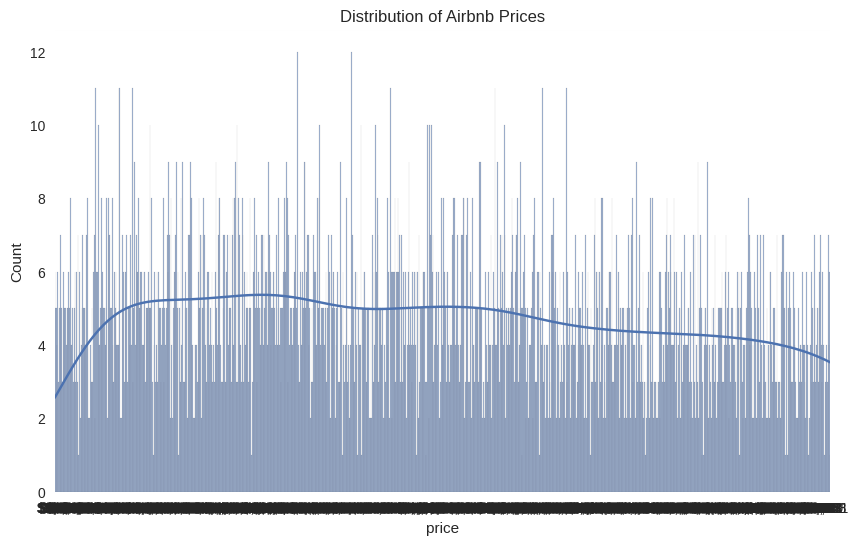

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0,1000)
plt.title("Distribution of Airbnb Prices")
plt.show()

/tmp/ipython-input-748796466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', palette="Set2")


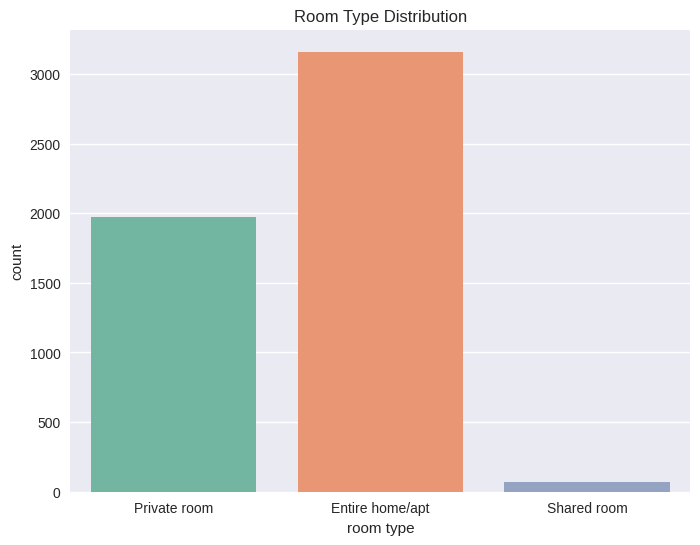

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='room type', palette="Set2")
plt.title("Room Type Distribution")
plt.show()

/tmp/ipython-input-215348882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood group', palette="Set1")


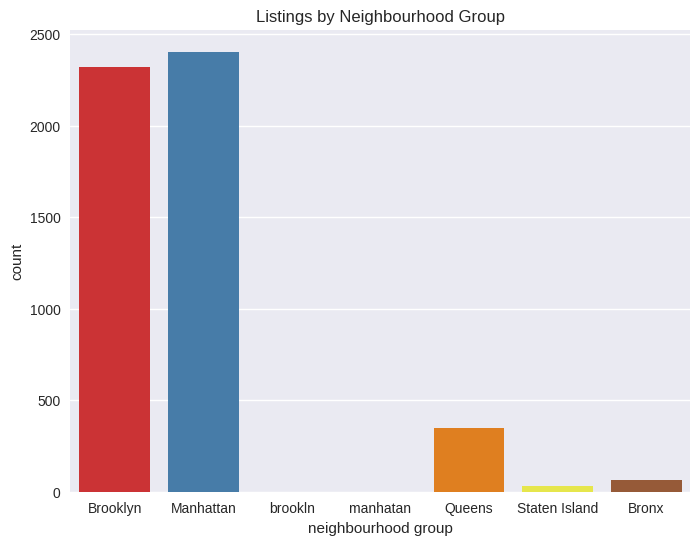

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='neighbourhood group', palette="Set1")
plt.title("Listings by Neighbourhood Group")
plt.show()

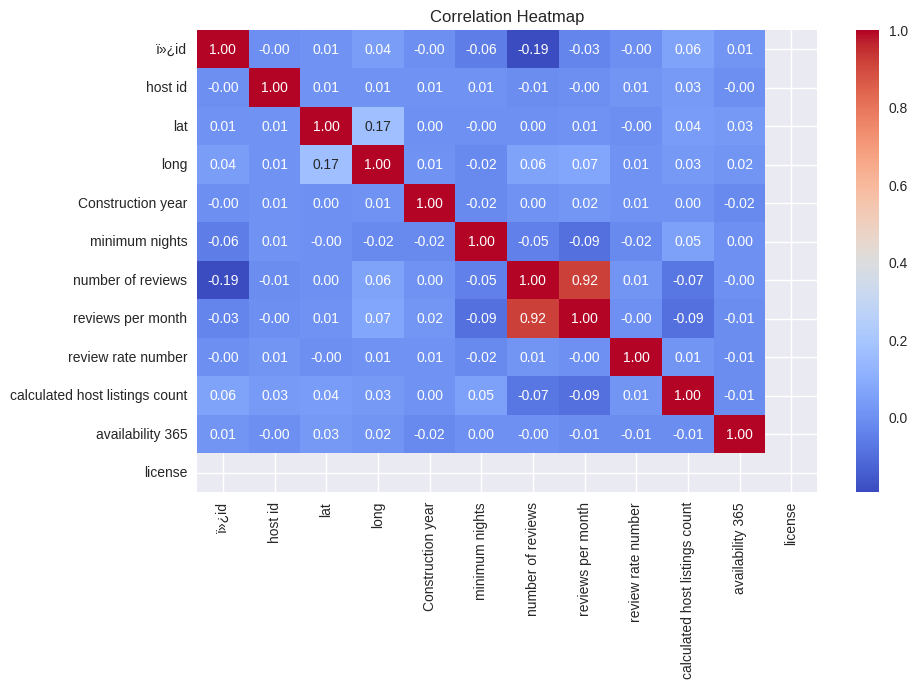

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [69]:
print(df['room type'].value_counts())

room type
Entire home/apt    3160
Private room       1971
Shared room          69
Name: count, dtype: int64


In [70]:
print(df['neighbourhood group'].value_counts())

neighbourhood group
Manhattan        2405
Brooklyn         2324
Queens            347
Bronx              62
Staten Island      33
brookln             1
manhatan            1
Name: count, dtype: int64


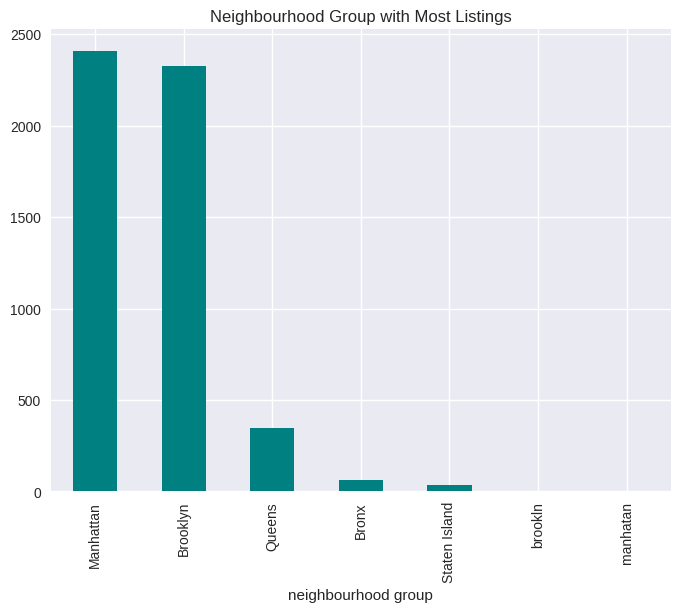

In [71]:
plt.figure(figsize=(8,6))
df['neighbourhood group'].value_counts().plot(kind='bar', color='teal')
plt.title("Neighbourhood Group with Most Listings")
plt.show()

In [72]:
df["price"] = df["price"].astype(str).str.replace(r"[\$,]", "", regex=True)
df["service fee"] = df["service fee"].astype(str).str.replace(r"[\$,]", "", regex=True)

df["price"] = df["price"].str.split().str[0]
df["service fee"] = df["service fee"].str.split().str[0]

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["service fee"] = pd.to_numeric(df["service fee"], errors="coerce")

avg_price = df.groupby("neighbourhood group")['price'].mean().sort_values(ascending=False)
print(avg_price)

neighbourhood group
Staten Island    718.242424
Queens           632.121387
Manhattan        618.217409
Brooklyn         616.012937
brookln          580.000000
Bronx            576.161290
manhatan         460.000000
Name: price, dtype: float64


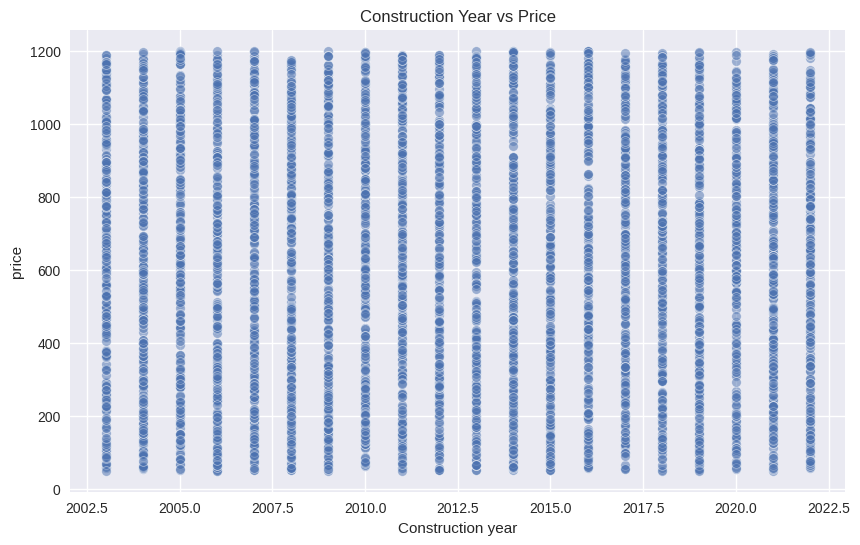

In [73]:
if 'Construction year' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.5)
    plt.title("Construction Year vs Price")
    plt.show()

In [ ]:
top_hosts = df['host id'].value_counts().head(10)
print(top_hosts)

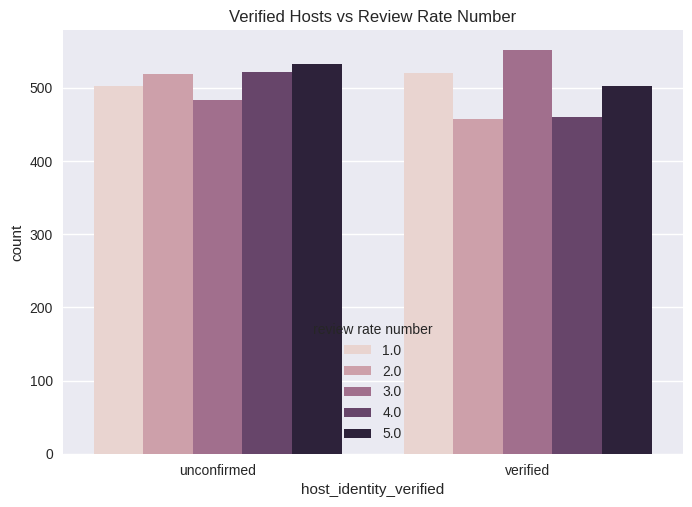

In [74]:
if 'host_identity_verified' in df.columns:
 sns.countplot(data=df, x='host_identity_verified', hue='review rate number')
 plt.title("Verified Hosts vs Review Rate Number")
 plt.show()


In [75]:
if 'service fee' in df.columns:
    corr = df['price'].corr(df['service fee'])
    print("Correlation between price & service fee:", corr)

Correlation between price & service fee: 0.9999911767085046


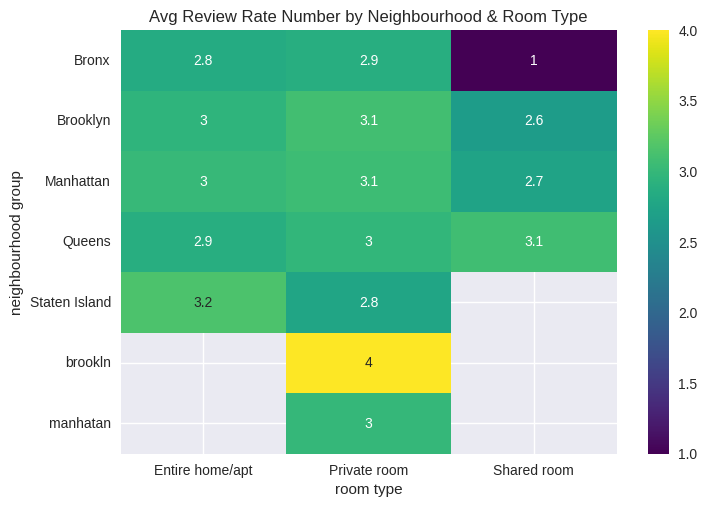

In [76]:
if 'review rate number' in df.columns:
    avg_reviews = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()
    sns.heatmap(avg_reviews, annot=True, cmap="viridis")
    plt.title("Avg Review Rate Number by Neighbourhood & Room Type")
    plt.show()


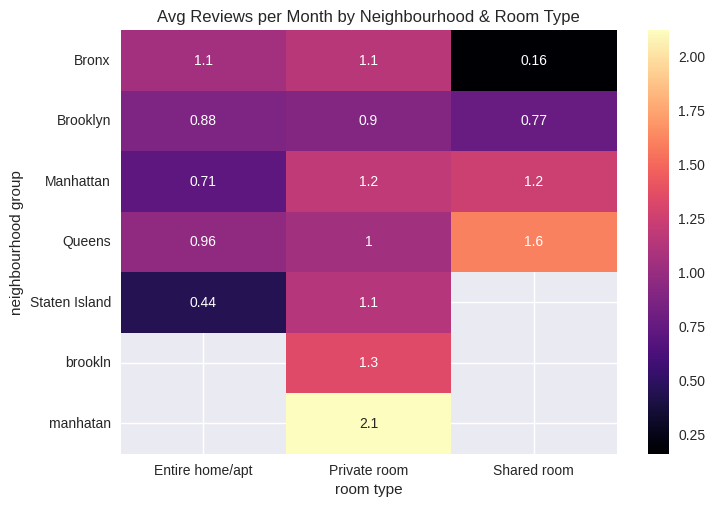

In [77]:
if 'reviews per month' in df.columns:
    avg_reviews = df.groupby(['neighbourhood group', 'room type'])['reviews per month'].mean().unstack()
    sns.heatmap(avg_reviews, annot=True, cmap="magma")
    plt.title("Avg Reviews per Month by Neighbourhood & Room Type")
    plt.show()


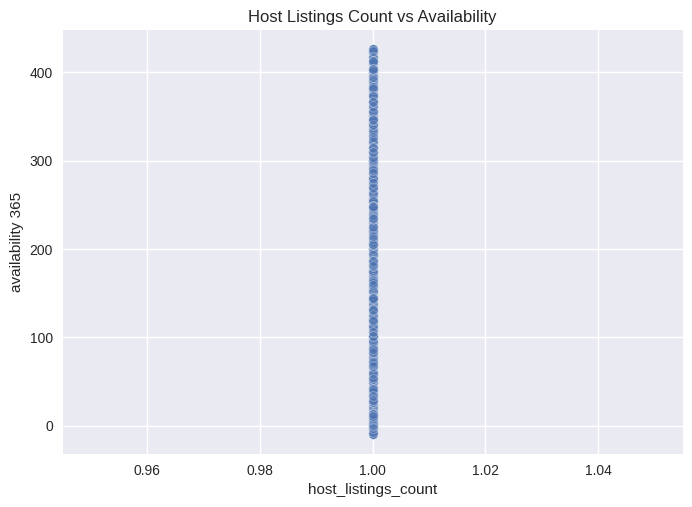

In [78]:
if 'availability 365' in df.columns:
    df['host_listings_count'] = df.groupby('host id')['ï»¿id'].transform('count')
    sns.scatterplot(data=df, x='host_listings_count', y='availability 365', alpha=0.4)
    plt.title("Host Listings Count vs Availability")
    plt.show()
